# **Proyecto integrador de Machine Learning sobre datos médicos**
## **Creado por Santos Iparraguirre**

## Modelamiento:

In [335]:
# Importación de librerías y carga de datos

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

from scipy.stats import randint
from scipy.stats import uniform

data = pd.read_csv('data1.csv')

In [336]:
# Separación del dataset en X e y

X = data.drop('hospitalizacion', axis=1)
y = data['hospitalizacion']

X

,diabetes_no,diabetes_si,hosp_ultimo_mes_no,hosp_ultimo_mes_si,biopsias_previas_no,biopsias_previas_si,volumen_prostatico_no,volumen_prostatico_si,antibiotico_cefalosporina_aminoglucocido,antibiotico_fluoroquinolona_aminoglicosido,...,agente_no,agente_pseudomonas_aeruginosa,patron_resistencia_ampi_r_cipro_r_genta_r_sulfa_m_r,patron_resistencia_multi_sensible,patron_resistencia_no,patron_resistencia_resistente_ampi_cipro_genta,patron_resistencia_resistente_ampi_sulfa_cefadroxilo_cefuroximo_cipro_cefepime_cefotaxima,edad,psa,num_muestras_tomadas
0,True,False,True,False,True,False,False,True,False,True,...,True,False,False,False,True,False,False,53.0,4.00,12.0
1,True,False,True,False,True,False,False,True,False,True,...,True,False,False,False,True,False,False,56.0,7.70,12.0
2,True,False,True,False,False,True,False,True,False,True,...,False,False,True,False,False,False,False,57.0,29.00,24.0
3,True,False,True,False,True,False,False,True,False,True,...,True,False,False,False,True,False,False,56.0,7.00,12.0
4,True,False,True,False,False,True,False,True,False,True,...,False,False,False,False,True,False,False,55.0,29.00,24.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
442,True,False,True,False,True,False,False,True,False,True,...,True,False,False,False,True,False,False,75.0,75.00,12.0
443,True,False,True,False,True,False,False,True,False,True,...,True,False,False,False,True,False,False,67.0,6.00,12.0
444,True,False,True,False,True,False,False,True,False,False,...,True,False,False,False,True,False,False,64.0,4.80,12.0
445,True,False,True,False,True,False,True,False,False,True,...,True,False,False,False,True,False,False,69.0,4.43,20.0


In [337]:
y

0      1
1      1
2      1
3      1
4      1
      ..
442    0
443    0
444    0
445    0
446    0
Name: hospitalizacion, Length: 447, dtype: int64

In [338]:
# Partición de datos para entrenamiento

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [339]:
y_train.value_counts()

hospitalizacion
0    317
1     18
Name: count, dtype: int64

### 1) Árbol de decisión

#### Entrenamiento

In [340]:
# Instanciamos la variable del modelo
model = DecisionTreeClassifier(random_state = 2)

# Entrenamos con x_train + y_train
model = model.fit(x_train,y_train)

# Predecimos con x_test
predict = model.predict(x_test)

#### Evaluación

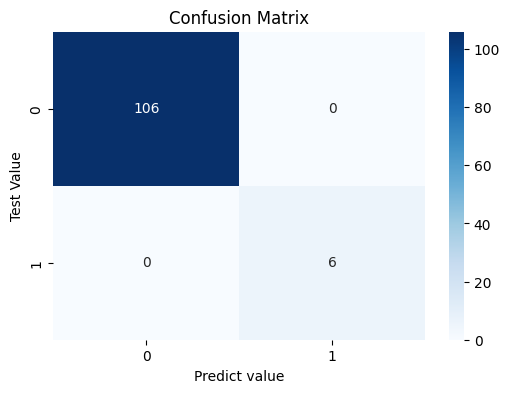

In [341]:
# Creamos la matriz con los resultados de y_test y la predicción del modelo

matrix = confusion_matrix(y_test,predict)

# Graficamos la matriz

plt.figure(figsize=(6, 4))
sns.heatmap(matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predict value')
plt.ylabel('Test Value')
plt.title('Confusion Matrix')
plt.show()

In [342]:
# Creamos e imprimimos las medidas comparando los resultados de y_test con las predicciones del modelo

accuracy = accuracy_score(y_test, predict)
precision = precision_score(y_test, predict)
recall = recall_score(y_test, predict)
f1 = f1_score(y_test, predict)
roc_auc = roc_auc_score(y_test, predict)

print('Accuracy:', round(accuracy,3))
print('Precision:', round(precision,3))
print('Recall:', round(recall,3))
print('F1:', round(f1,3))
print('ROC-AUC:', round(roc_auc,3))

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1: 1.0
ROC-AUC: 1.0


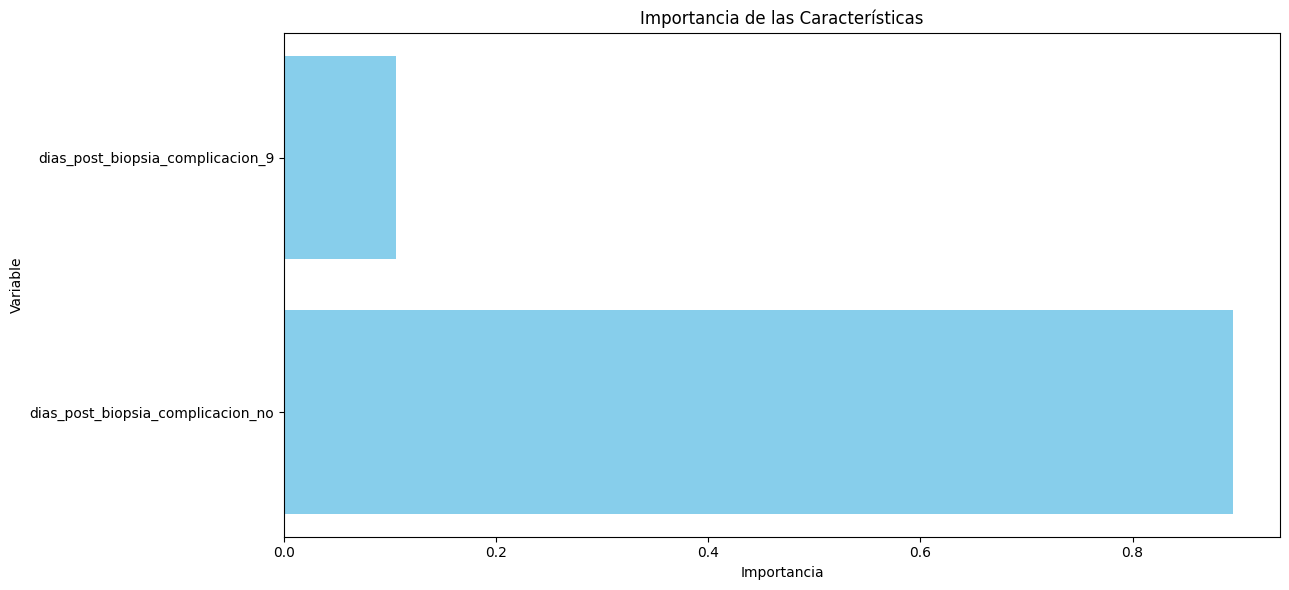

In [343]:
# Declaramos la variable importances, que contendrá la importancia de las características del modelo.

importances = model.feature_importances_

# Creamos la variable 'variables' que contendrá los nombres de las columnas de todas nuestras características.

variables = X.columns

# Creamos un dataframe con las variables y su respectiva importancia

df = pd.DataFrame({'Variable': variables, 'Importancia': importances})

# Lo ordenamos por importancia

df = df.sort_values('Importancia', ascending=False)

# Dropeamos las que no tengan importancia en el modelo

df = df[df['Importancia'] != 0]

# Graficamos 
plt.figure(figsize=(13,6))
plt.barh(df['Variable'], df['Importancia'], color='skyblue')
plt.xlabel('Importancia')
plt.ylabel('Variable')
plt.title('Importancia de las Características')
plt.tight_layout()
plt.show()

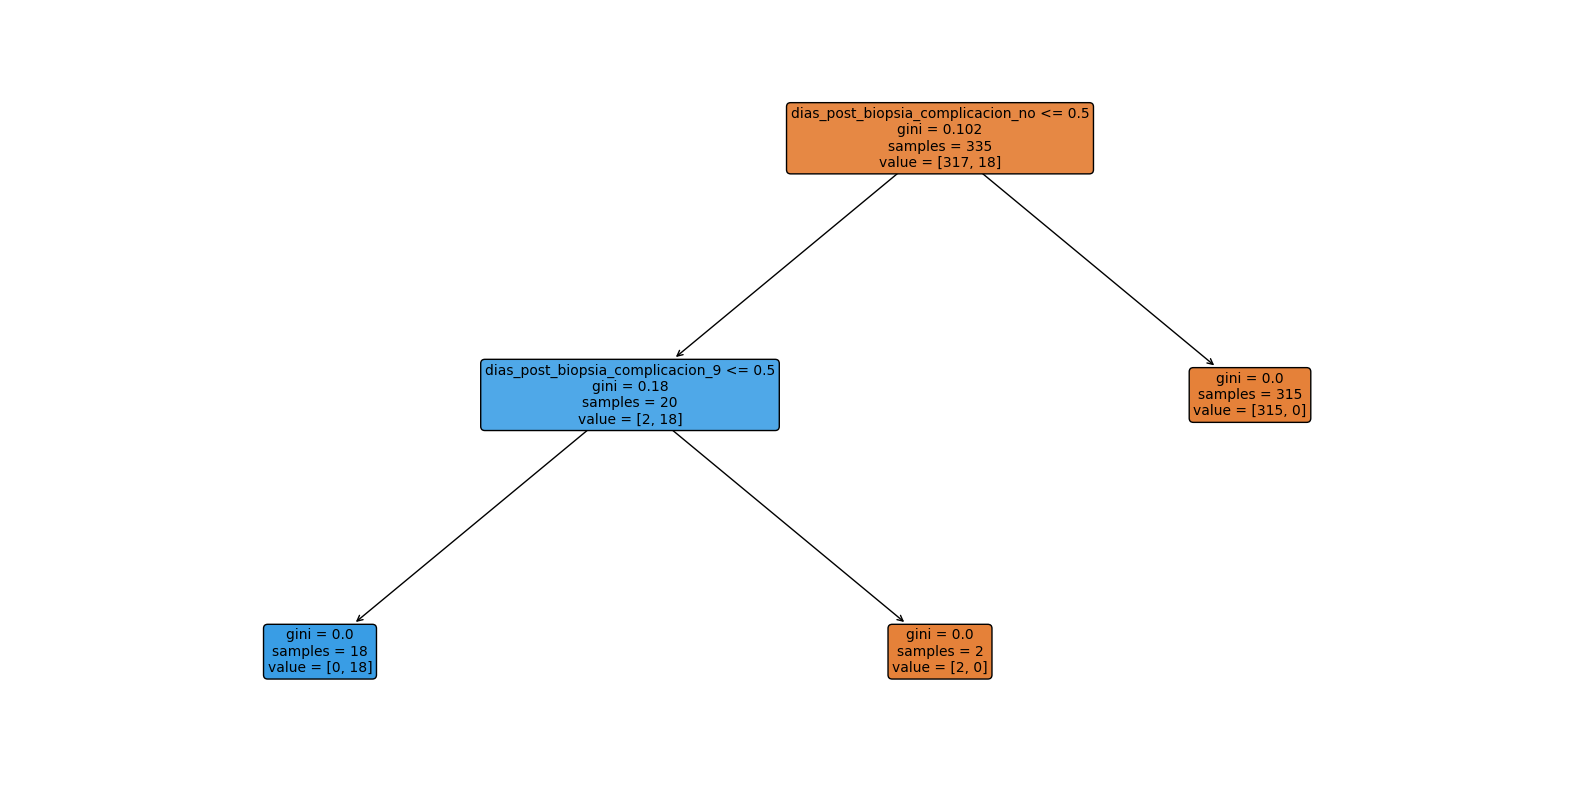

In [344]:
# Graficamos el árbol
plt.figure(figsize=(20,10))

plot_tree(model, feature_names=X.columns, filled=True, rounded=True, fontsize=10)

plt.show()

#### Validación 

In [345]:
parametro = {
    'max_depth': randint(1,12)
}

model_1 = DecisionTreeClassifier(random_state=2)

busqueda = RandomizedSearchCV(model_1, parametro, n_iter=60, scoring='f1', cv=6, random_state=1)

busqueda.fit(x_train, y_train)

print('Mejor hiperparámetro:', busqueda.best_params_)

rendimiento = busqueda.score(x_test,y_test)
print('Rendimiento del modelo:', rendimiento)

Mejor hiperparámetro: {'max_depth': 6}
Rendimiento del modelo: 1.0


In [346]:
model1 = DecisionTreeClassifier(max_depth=6, random_state=2)

model1 = model1.fit(x_train,y_train)

predict1 = model1.predict(x_test)

In [347]:
accuracy = accuracy_score(y_test, predict1)
precision = precision_score(y_test, predict1)
recall = recall_score(y_test, predict1)
f1 = f1_score(y_test, predict1)
roc_auc = roc_auc_score(y_test, predict1)

print('Accuracy:', round(accuracy,3))
print('Precision:', round(precision,3))
print('Recall:', round(recall,3))
print('F1:', round(f1,3))
print('ROC-AUC:', round(roc_auc,3))

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1: 1.0
ROC-AUC: 1.0


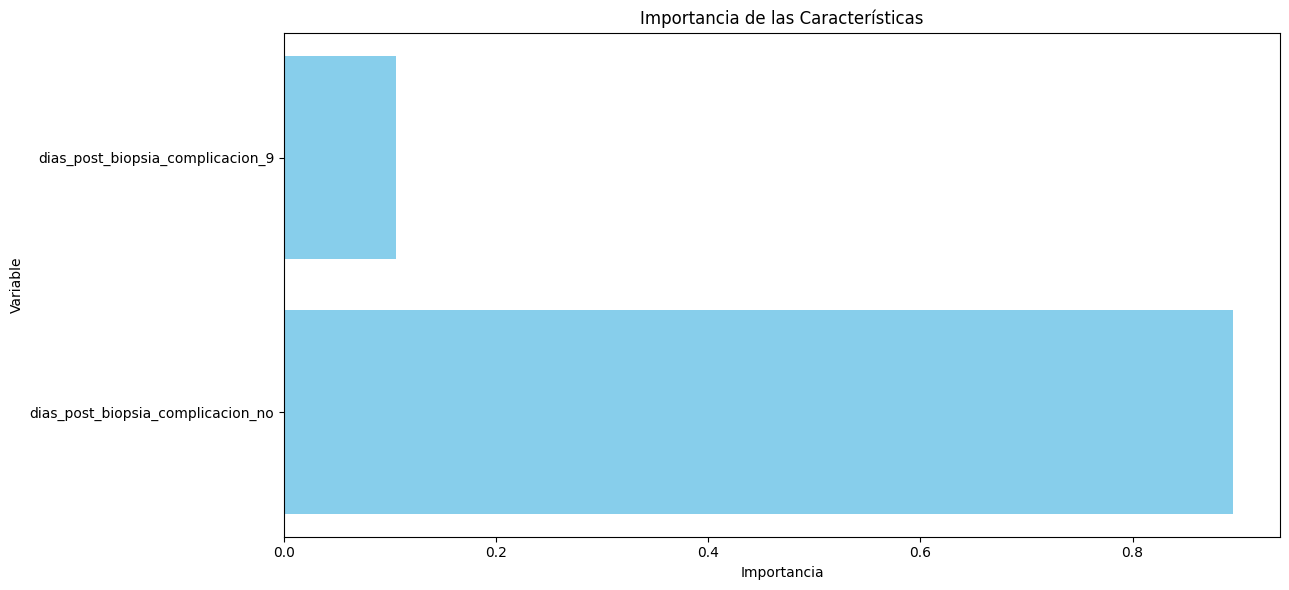

In [348]:
importances = model1.feature_importances_

variables = X.columns

df = pd.DataFrame({'Variable': variables, 'Importancia': importances})

df = df.sort_values('Importancia', ascending=False)

df = df[df['Importancia'] != 0]

 
plt.figure(figsize=(13,6))
plt.barh(df['Variable'], df['Importancia'], color='skyblue')
plt.xlabel('Importancia')
plt.ylabel('Variable')
plt.title('Importancia de las Características')
plt.tight_layout()
plt.show()

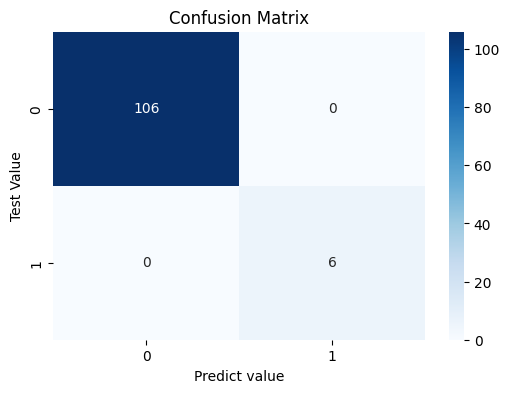

In [349]:
matrix = confusion_matrix(y_test,predict1)

plt.figure(figsize=(6, 4))
sns.heatmap(matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predict value')
plt.ylabel('Test Value')
plt.title('Confusion Matrix')
plt.show()

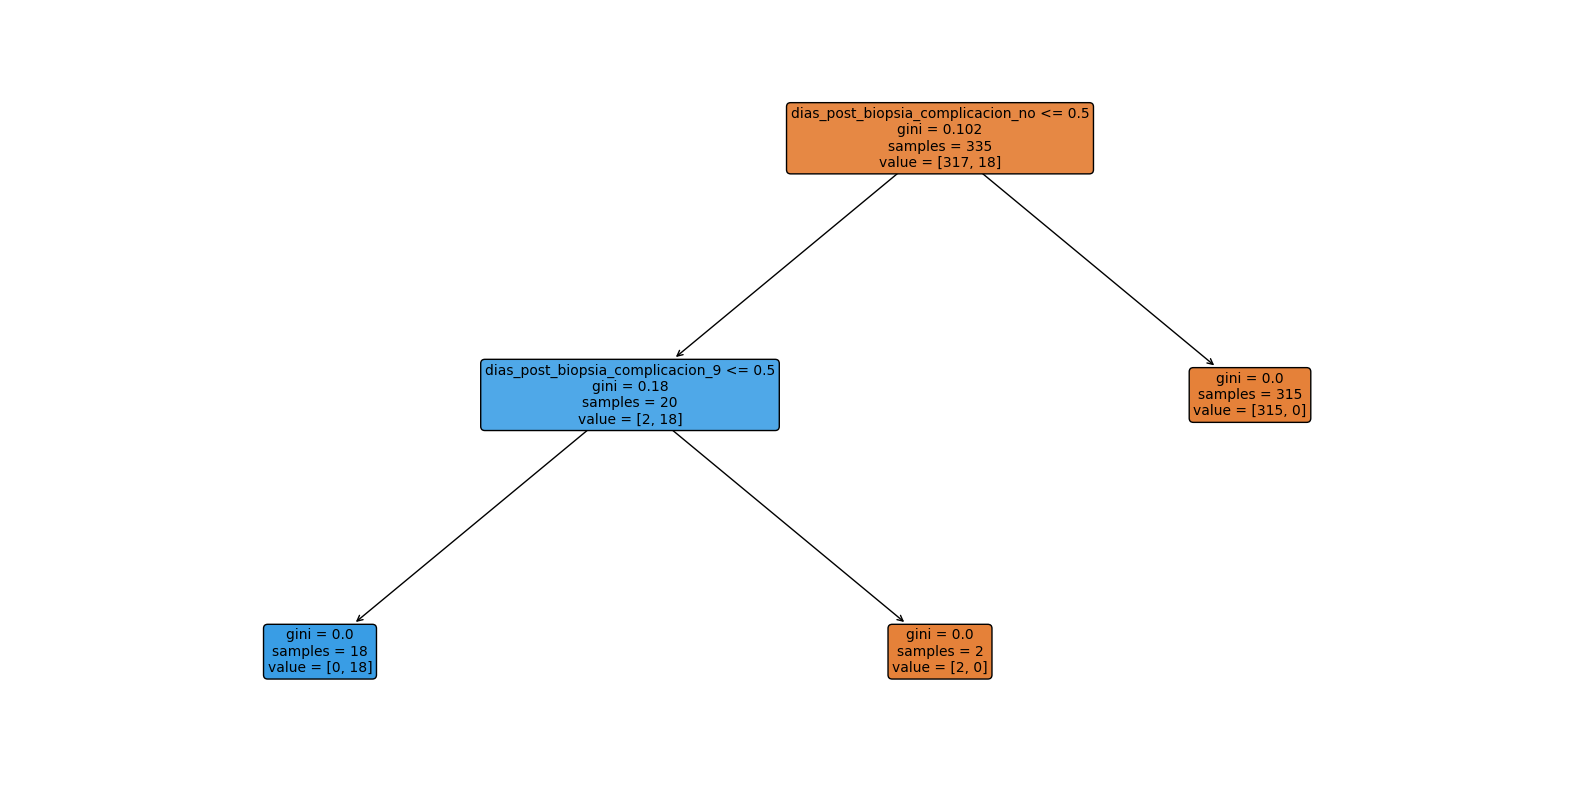

In [350]:
plt.figure(figsize=(20,10))

plot_tree(model1, feature_names=X.columns, filled=True, rounded=True, fontsize=10)

plt.show()

#### Conclusión sobre el modelo: 

Es muy efectivo a la hora de predecir con esta partición de los datos, pero su manera de decidir está muy ligada a una sola variable, por lo que no parece confiable.

### 2) K-Vecinos

#### Entrenamiento

In [351]:
knn = KNeighborsClassifier()

knn = knn.fit(x_train,y_train)

knnpredict = knn.predict(x_test)

#### Evaluación

In [352]:
accuracy = accuracy_score(y_test, knnpredict)
precision = precision_score(y_test, knnpredict)
recall = recall_score(y_test, knnpredict)
f1 = f1_score(y_test, knnpredict)
roc_auc = roc_auc_score(y_test, knnpredict)

print('Accuracy:', round(accuracy,3))
print('Precision:', round(precision,3))
print('Recall:', round(recall,3))
print('F1:', round(f1,3))
print('ROC-AUC:', round(roc_auc,3))

Accuracy: 0.955
Precision: 1.0
Recall: 0.167
F1: 0.286
ROC-AUC: 0.583


#### Validación

In [353]:
parametro = {
    'n_neighbors': randint(1,10)
}

knnparameter = KNeighborsClassifier()

# Nos centramos en la medida recall ya que es muy importante no tener falsos negativos en este caso

busqueda = RandomizedSearchCV(knnparameter, parametro, n_iter=60, cv=6, scoring='recall', random_state=1)

busqueda.fit(x_train, y_train)

print('Mejor hiperparámetro:', busqueda.best_params_)

rendimiento = busqueda.score(x_test,y_test)
print('Rendimiento del modelo:', rendimiento)

Mejor hiperparámetro: {'n_neighbors': 1}
Rendimiento del modelo: 0.8333333333333334


In [354]:
knn = KNeighborsClassifier(n_neighbors=1)

knn = knn.fit(x_train,y_train)

knnpredict = knn.predict(x_test)

In [355]:
accuracy = accuracy_score(y_test, knnpredict)
precision = precision_score(y_test, knnpredict)
recall = recall_score(y_test, knnpredict)
f1 = f1_score(y_test, knnpredict)
roc_auc = roc_auc_score(y_test, knnpredict)

print('Accuracy:', round(accuracy,3))
print('Precision:', round(precision,3))
print('Recall:', round(recall,3))
print('F1:', round(f1,3))
print('ROC-AUC:', round(roc_auc,3))

Accuracy: 0.991
Precision: 1.0
Recall: 0.833
F1: 0.909
ROC-AUC: 0.917


#### Conclusión del modelo:

Lo probamos por recomendación pero sabemos que no es adecuado para los datos y objetivos que manejamos.

### 3) Bosque Aleatorio

In [356]:
forest = RandomForestClassifier()

forest.fit(x_train,y_train)

predictforest = forest.predict(x_test)

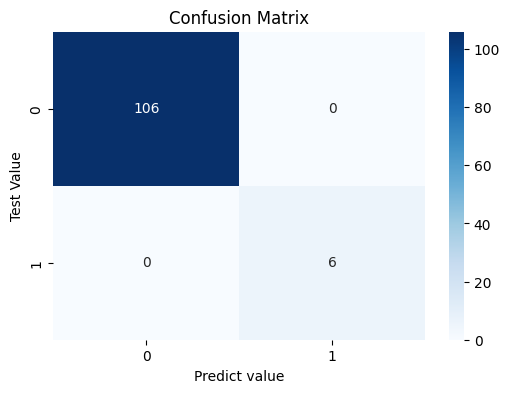

In [357]:
matrix = confusion_matrix(y_test,predictforest)

plt.figure(figsize=(6, 4))
sns.heatmap(matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predict value')
plt.ylabel('Test Value')
plt.title('Confusion Matrix')
plt.show()

In [358]:
accuracy = accuracy_score(y_test, predictforest)
precision = precision_score(y_test, predictforest)
recall = recall_score(y_test, predictforest)
f1 = f1_score(y_test, predictforest)
roc_auc = roc_auc_score(y_test, predictforest)

print('Accuracy:', round(accuracy,3))
print('Precision:', round(precision,3))
print('Recall:', round(recall,3))
print('F1:', round(f1,3))
print('ROC-AUC:', round(roc_auc,3))

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1: 1.0
ROC-AUC: 1.0


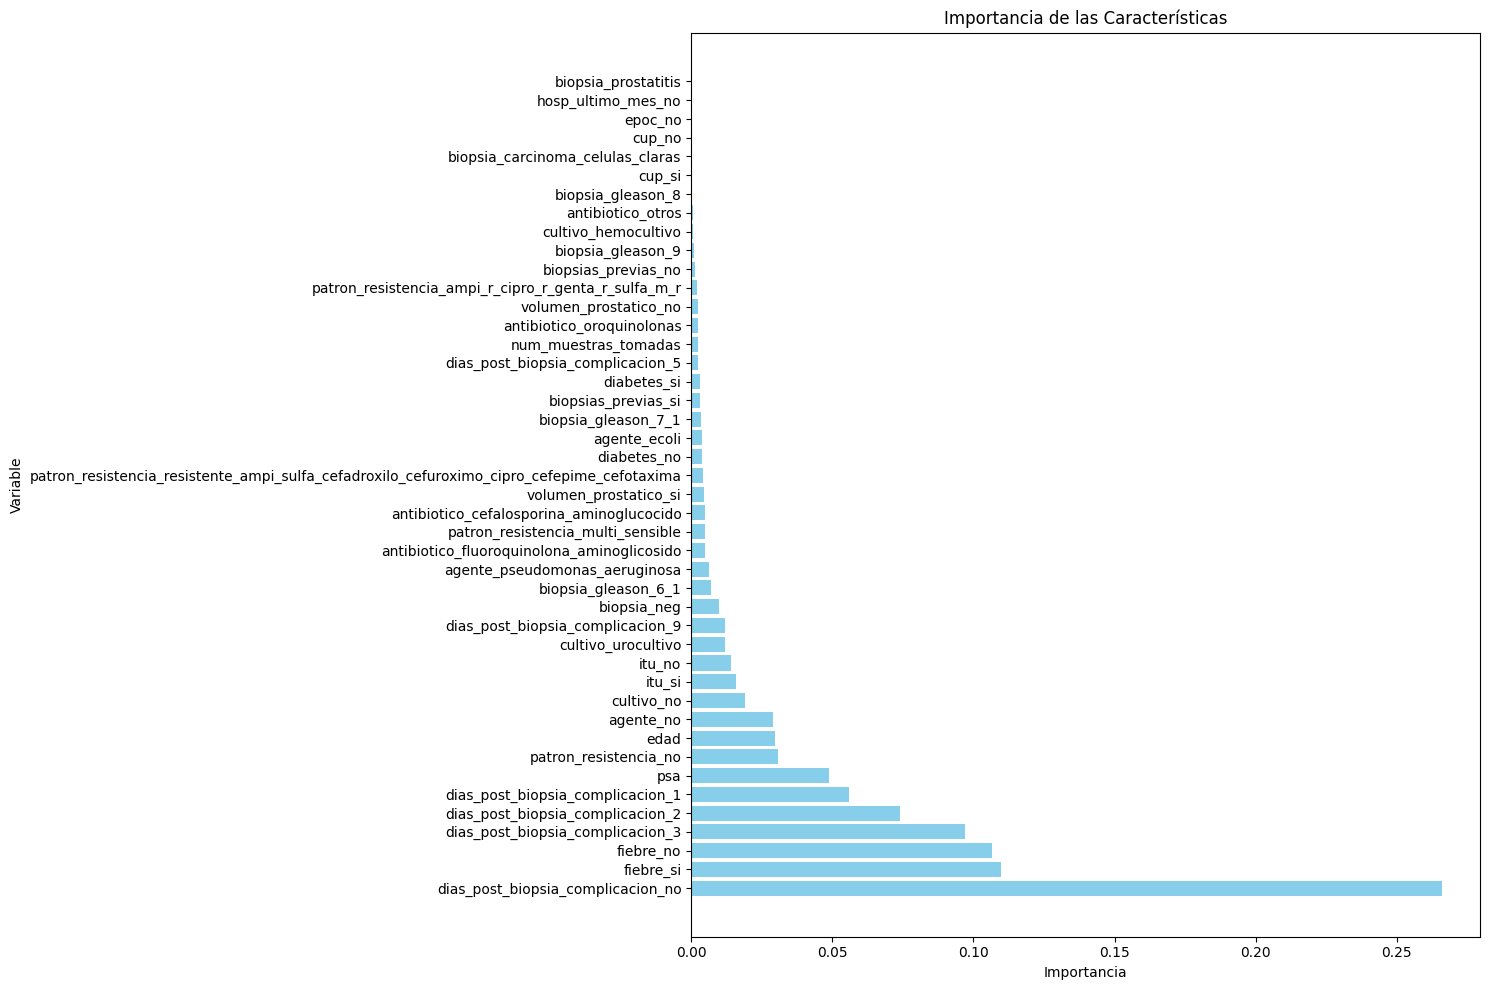

In [359]:
importances = forest.feature_importances_

variables = X.columns

df = pd.DataFrame({'Variable': variables, 'Importancia': importances})

df = df.sort_values('Importancia', ascending=False)

df = df[df['Importancia'] > 0]

 
plt.figure(figsize=(15,10))
plt.barh(df['Variable'], df['Importancia'], color='skyblue')
plt.xlabel('Importancia')
plt.ylabel('Variable')
plt.title('Importancia de las Características')
plt.tight_layout()
plt.show()

In [360]:
parametros = { 
    'n_estimators': randint(1, 200),     # Número de árboles en el bosque
    'max_depth': randint(1, 20),         # Profundidad máxima de cada árbol
    'min_samples_split': randint(2, 20), # Número mínimo de muestras requeridas para dividir un nodo interno
    'min_samples_leaf': randint(1, 20),  # Número mínimo de muestras requeridas en cada hoja del árbol
    'bootstrap': [True, False]           # Método de muestreo para construir árboles
}


busqueda = RandomizedSearchCV(estimator=forest, param_distributions=parametros, n_iter=50, cv=5, scoring='f1', random_state=1)

busqueda.fit(x_train, y_train)

print('Mejores hiperparámetros:', busqueda.best_params_)

rendimiento = busqueda.score(x_test,y_test)
print('Rendimiento del modelo:', rendimiento)

Mejores hiperparámetros: {'bootstrap': False, 'max_depth': 11, 'min_samples_leaf': 1, 'min_samples_split': 9, 'n_estimators': 97}
Rendimiento del modelo: 1.0


In [361]:
forest = RandomForestClassifier(bootstrap=False, max_depth=11, min_samples_leaf=1, min_samples_split=9, n_estimators=97)

forest.fit(x_train,y_train)

predictforest = forest.predict(x_test)

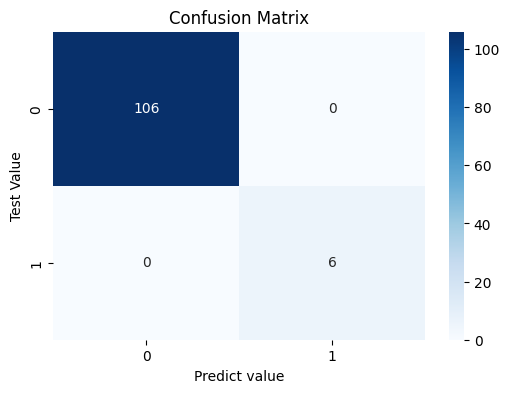

In [362]:
matrix = confusion_matrix(y_test,predictforest)

plt.figure(figsize=(6, 4))
sns.heatmap(matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predict value')
plt.ylabel('Test Value')
plt.title('Confusion Matrix')
plt.show()

In [363]:
accuracy = accuracy_score(y_test, predictforest)
precision = precision_score(y_test, predictforest)
recall = recall_score(y_test, predictforest)
f1 = f1_score(y_test, predictforest)
roc_auc = roc_auc_score(y_test, predictforest)

print('Accuracy:', round(accuracy,3))
print('Precision:', round(precision,3))
print('Recall:', round(recall,3))
print('F1:', round(f1,3))
print('ROC-AUC:', round(roc_auc,3))

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1: 1.0
ROC-AUC: 1.0


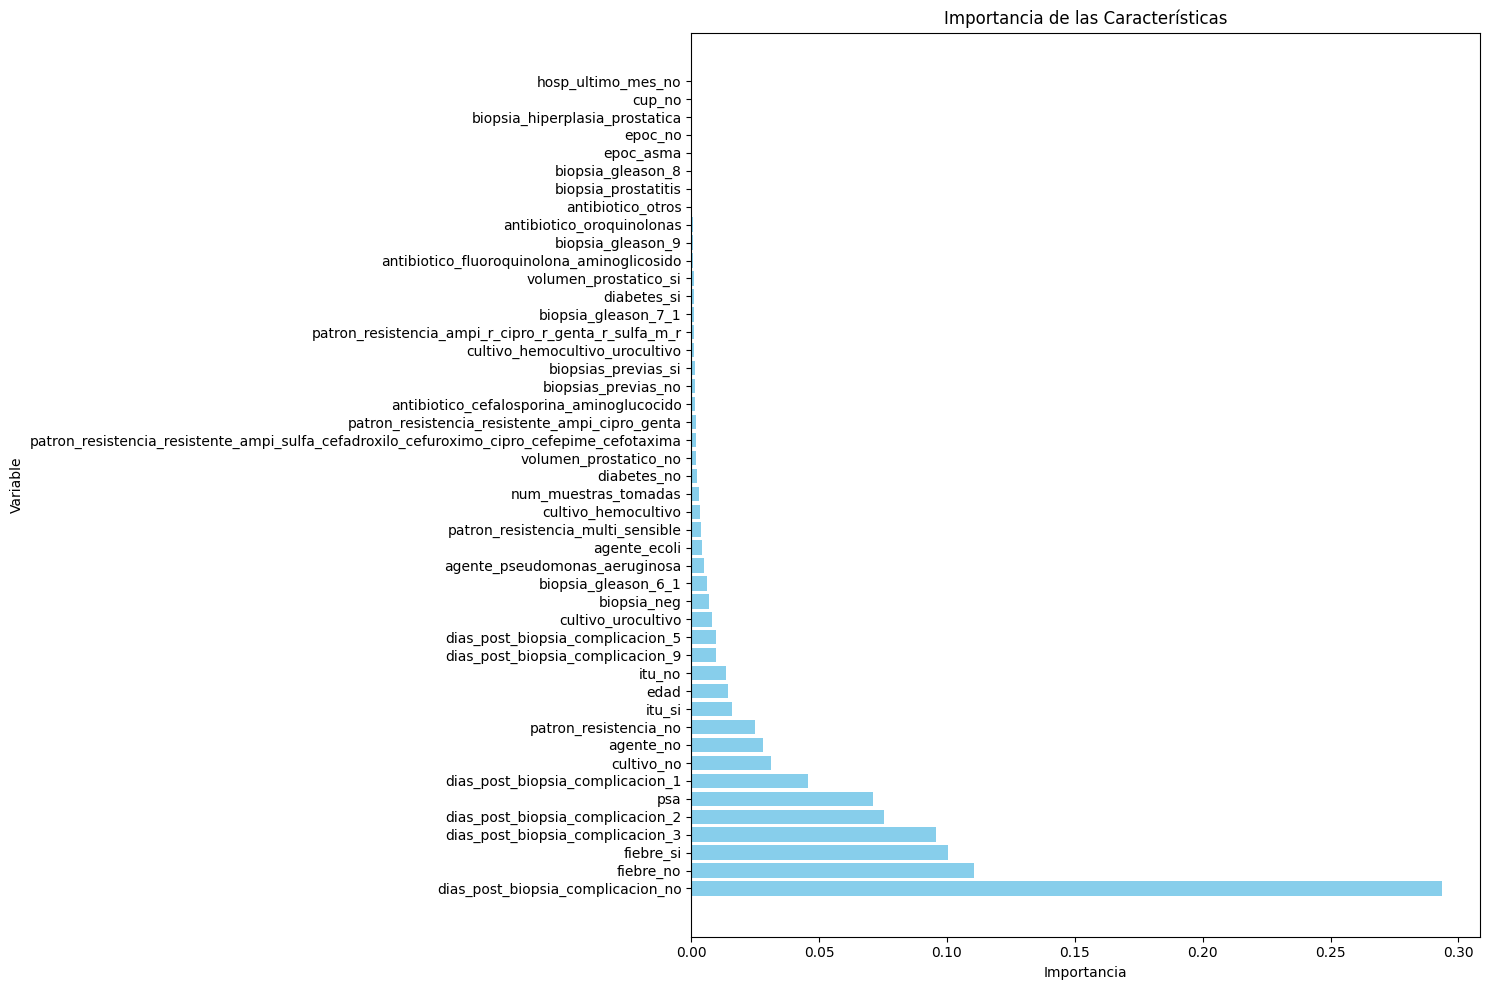

In [364]:
importances = forest.feature_importances_

variables = X.columns

df = pd.DataFrame({'Variable': variables, 'Importancia': importances})

df = df.sort_values('Importancia', ascending=False)

df = df[df['Importancia'] > 0]

 
plt.figure(figsize=(15,10))
plt.barh(df['Variable'], df['Importancia'], color='skyblue')
plt.xlabel('Importancia')
plt.ylabel('Variable')
plt.title('Importancia de las Características')
plt.tight_layout()
plt.show()

#### Conclusión:

Este modelo también predice muy bien sobre nuestros datos sin ninguna falla, y además la importancia que le otorga a cada variable tiene mucho más coherencia para la problemática que enfrentamos.